# Classification des chiffres manuscrits du jeu de données MNIST en utilisant un réseau de neurones convolutif

Dans ce scénario, nous aborderons la classification des chiffres manuscrits à partir du jeu de données MNIST en optant pour une approche différente. Cette fois-ci, nous exploiterons un réseau de neurones convolutif. Notre objectif est de développer un modèle qui peut automatiquement reconnaître les chiffres écrits à la main avec une plus grande précision en capturant les motifs et les caractéristiques clés dans les images. En utilisant TensorFlow, nous construirons et entraînerons ce réseau de neurones convolutif pour réaliser cette tâche de classification complexe, mettant en évidence comment TensorFlow peut être appliqué à des problèmes de vision par ordinateur avancés tels que la reconnaissance de caractères.

## 1. Importation des bibliothéques nécessaires

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2. Préparation des données

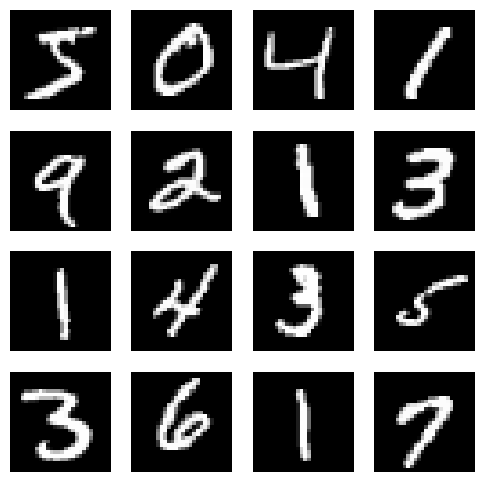

In [2]:
# Charger les données MNIST et les diviser en ensembles d'entraînement et de test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Affichage de quelques images d'entraînement
plt.figure(figsize=(6, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

## 3. Mise à l'échelle des caractéristiques

In [3]:
# Normaliser et remodeler les données d'entraînement et de test
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## 4. Construction du modèle

In [4]:
# Créer un modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## 5. Compilation du modèle

In [5]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 6. Entraînement du modèle

In [6]:
# Entraîner le modèle
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 17s 10ms/step - loss: 0.1642 - accuracy: 0.9486 - val_loss: 0.0745 - val_accuracy: 0.9764
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0543 - val_accuracy: 0.9846
Epoch 3/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0424 - val_accuracy: 0.9885
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0565 - val_accuracy: 0.9830
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0376 - val_accuracy: 0.9896


## 7. Évaluation des résultats

In [7]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Accuracy on test set: {test_acc}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9909
Accuracy on test set: 0.9908999800682068


#### Affichage des images non reconnues

313/313 [==============================] - 1s 3ms/step


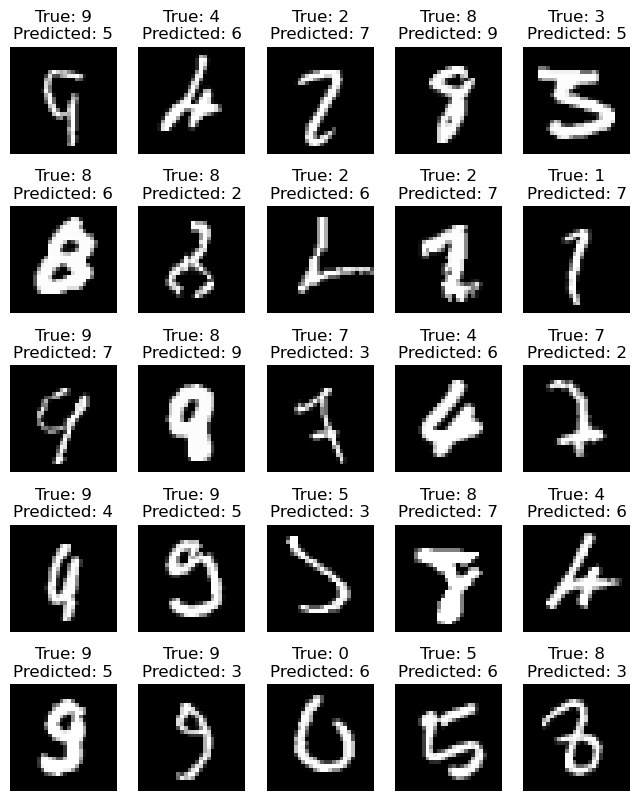

In [8]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Affichage de quelques images mal classées
misclassified_indices = np.where(y_pred_labels != y_true_labels)[0]
plt.figure(figsize=(8, 10))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_labels[idx]}\nPredicted: {y_pred_labels[idx]}')
    plt.axis('off')
plt.show()

#### Matrice de confusion

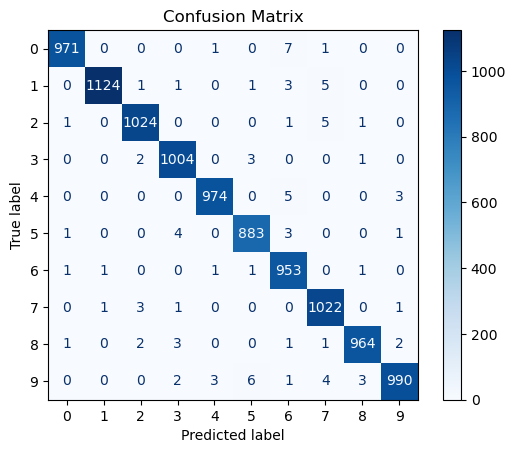

In [9]:
# Matrice de confusion
confusion = confusion_matrix(y_true_labels, y_pred_labels)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.arange(10))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()